# Q1. Design and test a PCA model on Iris database.

In [196]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier


In [197]:
iris = load_iris()

In [198]:
X = iris.data[:, 2:]  # Petal length and width
y = iris.target
X.shape, y.shape

((150, 2), (150,))

In [199]:
# Train a random forest classifier on the dataset and time how long it takes



In [200]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
%timeit -n1 -r1 forest.fit(X_train, y_train)


87 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Then evaluate the resulting model on the test set



In [201]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, forest.predict(X_test))


0.98

# Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%



In [202]:
from sklearn.decomposition import PCA


In [203]:
pca = PCA(n_components=0.95)


In [204]:
pca.fit(X_train)


PCA(n_components=0.95)

In [205]:
X_train_ = pca.transform(X_train)
X_test_ = pca.transform(X_test)

# Train a random forest classifier on the reduced dataset and see how long it takes. Was training much faster?



In [206]:
forest = RandomForestClassifier(n_estimators=100)
%timeit -n1 -r1 forest.fit(X_train_, y_train)


89.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [207]:
accuracy_score(y_test, forest.predict(X_test_))  # expected.


0.94

# Use t-SNE to reduce the iris dataset down to two dimensions and plot the result using matplotlib



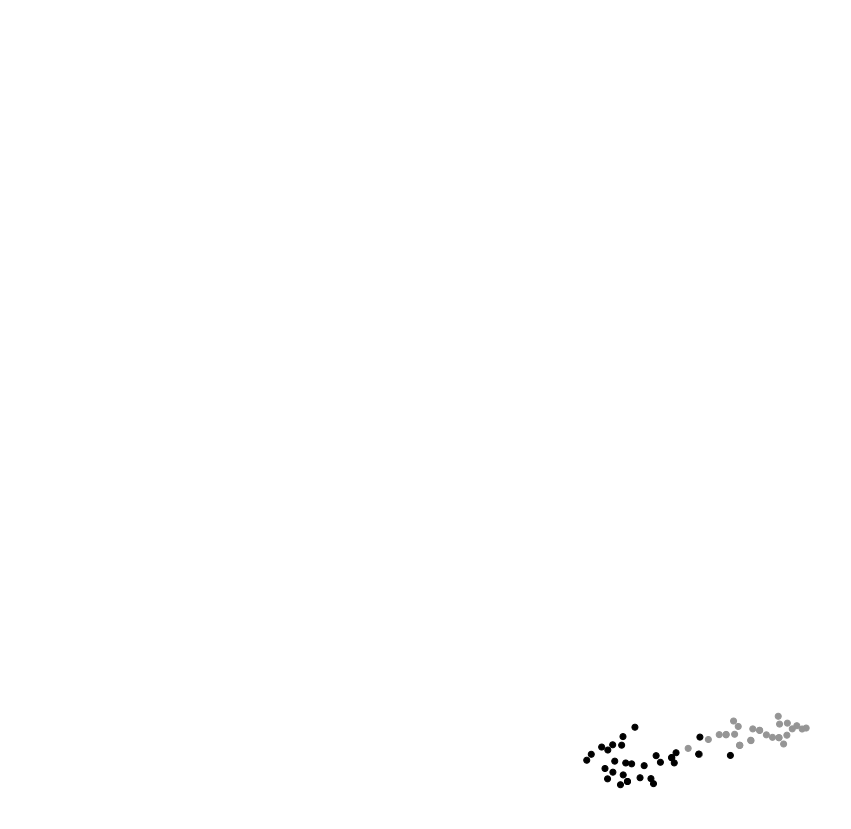

In [208]:
from sklearn.manifold import TSNE
tsne = TSNE()

X_train_ = tsne.fit_transform(X_train[:1000])
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.scatter(X_train_[:, 0], X_train_[:, 1], c=y_train[:1000].astype(int), cmap='Greys')
plt.axis('off')
plt.show()

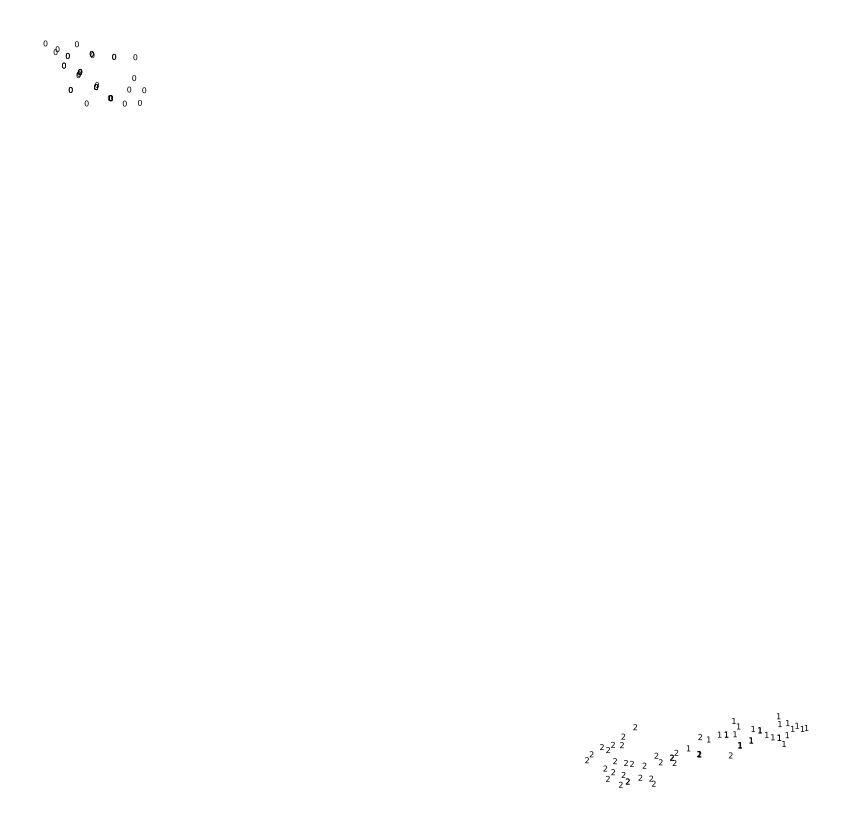

In [209]:


plt.figure(figsize=(15, 15))
labels = y_train[:1000].astype(int)
for idx in range(len(X_train_)):
    plt.scatter(X_train_[idx,0], X_train_[idx,1], marker=f"$ {labels[idx]} $", c='black', edgecolors='none')
plt.axis('off')
plt.show()

In [210]:
from matplotlib.offsetbox import AnnotationBbox, OffsetImage


ValueError: cannot reshape array of size 2 into shape (28,28)

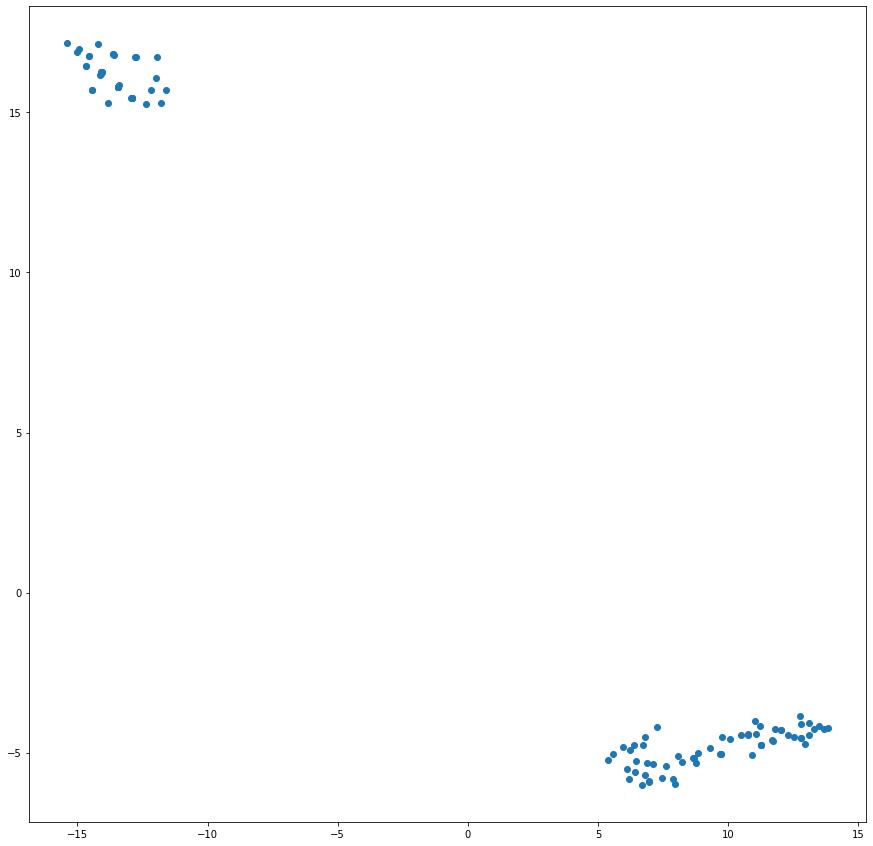

In [211]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(X_train_[:, 0], X_train_[:,1])

for idx in range(len(X_train_)):
    ab = AnnotationBbox(OffsetImage(X_train[idx].reshape(28, 28), zoom=0.7), (X_train_[idx, 0], X_train_[idx, 1]), frameon=False)
    ax.add_artist(ab)

plt.axis('off')
plt.show()

In [212]:
X_centered = X - X.mean(axis=0)


In [213]:
U, s, Vt = np.linalg.svd(a=X_centered)


In [214]:
print(s)


[23.35646525  2.31751258]


In [215]:
print(U)


[[-0.10964896 -0.00298691 -0.11505848 ...  0.05886359  0.0594168
   0.06060099]
 [-0.10964896 -0.00298691 -0.00157764 ...  0.08542512  0.171742
   0.0225608 ]
 [-0.11359552  0.01374305  0.98807503 ...  0.00527955  0.00449925
   0.00606996]
 ...
 [ 0.07020056  0.07721474  0.00616751 ...  0.99015309 -0.01670194
  -0.00496682]
 [ 0.08307371  0.16307815  0.0062929  ... -0.01716102  0.96858847
  -0.00689465]
 [ 0.06293399  0.01439581  0.00629798 ... -0.00461579 -0.00606769
   0.99632495]]


In [216]:
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [217]:
c1, c2


(array([0.92177769, 0.38771882]), array([-0.38771882,  0.92177769]))

In [218]:
W2 = Vt.T[:, :2]


In [219]:

X2D = X_centered.dot(W2)
X2D.shape

(150, 2)

In [220]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
assert np.all(np.abs(pca.components_) == np.abs(W2))
print(pca.components_)

print(W2)


[[ 0.92177769  0.38771882]
 [-0.38771882  0.92177769]]
[[ 0.92177769 -0.38771882]
 [ 0.38771882  0.92177769]]


In [221]:
pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_)


(array([0.99025066, 0.00974934]), 0.9999999999999999)

In [222]:
pca = PCA()


In [223]:
pca.fit(X)


PCA()

In [224]:
cumsum = np.cumsum(pca.explained_variance_ratio_)


In [225]:
d = np.argmax(cumsum >= .95) + 1


In [226]:
d


1

In [227]:
pca = PCA(n_components=0.95)


In [228]:
X_reduced = pca.fit_transform(X)


In [229]:
X_reduced.shape


(150, 1)

In [230]:
X = iris.data[:, 2:]  # Petal length and width
y = iris.target
X.shape, y.shape

((150, 2), (150,))

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


In [232]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((100, 2), (50, 2), (100,), (50,))

In [233]:
pca = PCA(n_components=154)


In [234]:
# X_reduced = pca.fit_transform(X_train)


In [235]:
# X_recovered = pca.inverse_transform(X_reduced)


In [236]:
# plt.imshow(X_train[0].reshape(29, 28), cmap='binary')
# plt.axis('off')
plt.show()

In [237]:
X, _ = datasets.make_swiss_roll(n_samples=1000, noise=1)


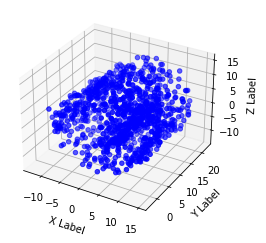

In [238]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c='b', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [239]:
from sklearn.decomposition import KernelPCA


In [240]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04, n_jobs=-1)


In [241]:
X_reduced = rbf_pca.fit_transform(X)


In [242]:
X_reduced.shape


(1000, 2)

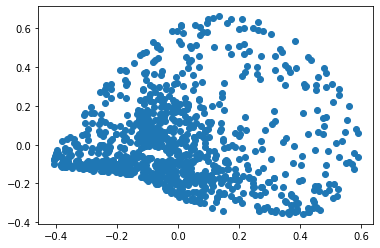

In [243]:
plt.scatter(X_reduced[:,0], X_reduced[:,1])
plt.show()


# Q2. Train and evaluate KMeans models on the dataset HW7_Q2.

In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [343]:
datasets = pd.read_csv("/home/kaji/workSpace/hw7_Q2.csv")

In [344]:
datasets.head


<bound method NDFrame.head of            x1        x2
0   -6.689528 -6.574817
1    3.936123  1.584261
2   -8.452478  5.899252
3   -6.599732 -6.339719
4   -9.909051  9.614158
..        ...       ...
995  3.577931  1.710292
996 -7.553720 -6.508478
997 -9.143084  7.230037
998 -6.897121 -5.994709
999  2.534331  4.457715

[1000 rows x 2 columns]>

In [345]:
datasets.tail

<bound method NDFrame.tail of            x1        x2
0   -6.689528 -6.574817
1    3.936123  1.584261
2   -8.452478  5.899252
3   -6.599732 -6.339719
4   -9.909051  9.614158
..        ...       ...
995  3.577931  1.710292
996 -7.553720 -6.508478
997 -9.143084  7.230037
998 -6.897121 -5.994709
999  2.534331  4.457715

[1000 rows x 2 columns]>

In [346]:
# # from sklearn import datasets
# import matplotlib.pyplot as plt
# import numpy as np

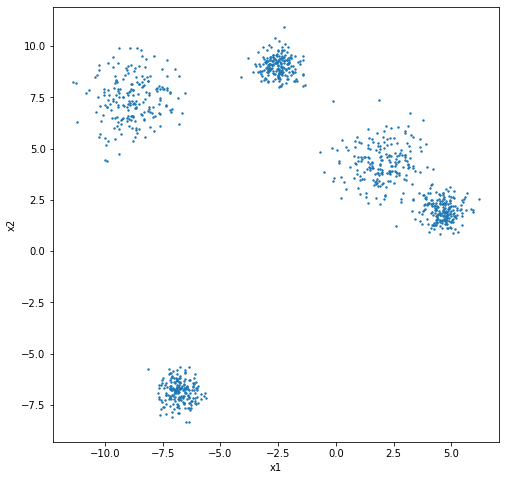

In [361]:

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [362]:
from sklearn.cluster import KMeans


In [363]:
k = 5


In [364]:
kmeans = KMeans(n_clusters=k)


In [365]:
y_pred = kmeans.fit_predict(X)


In [366]:
y_pred is kmeans.labels_


True

In [367]:
print(sum(y_pred == kmeans.labels_)/len(y_pred))


1.0


In [368]:
kmeans.cluster_centers_


array([[ 4.57925901,  1.98967321],
       [-8.82326814,  7.40132883],
       [-6.78296705, -6.84575207],
       [-2.50804399,  9.02008423],
       [ 1.95897075,  4.33065786]])

In [369]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])


In [370]:
kmeans.predict(X_new)


array([4, 0, 4, 4], dtype=int32)

In [371]:
from sklearn.cluster import MiniBatchKMeans


In [372]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)


In [360]:
minibatch_kmeans.fit(X)


MiniBatchKMeans(n_clusters=5)